In [4]:
# 資料權限
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# 正常显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示符号
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing

# 在線GPU性能检验
!nvidia-smi 

Mounted at /content/gdrive/
Sat May 15 05:37:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [5]:
#匯入資料
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw['Date'] = pd.to_datetime(raw.Date, format = '%Y/%m/%d')

#read the data
stock = raw 
amount = len(stock) #總資料筆數

data= stock
Id=data.loc[:,'Date']   #ID先提取出来，后面合并表格要用
data=data.drop('Date',axis=1)
date= raw[['Date']].values
data

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...
746,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [6]:
x=data.loc[:,data.columns!='TSLA']  #BEFORE LOOP TEST
y=data.loc[:,'TSLA']   #BEFORE LOOP

In [7]:
#BEFORE LOOP TEST 
length= 200
x_train= x[:length]
x_test= x[length:]

y_train= y[:length]
y_test= y[length:]

x_train_scale= StandardScaler()
#x_train= np.array(x_train).reshape(-1,1)
x_train1= x_train_scale.fit_transform(x_train)

x_test_scale= StandardScaler()
#x_test= np.array(x_test).reshape(-1,1)
x_test1= x_test_scale.fit_transform(x_test)

y_train_scale= StandardScaler()
y_train= np.array(y_train).reshape(-1,1)
y_train1= y_train_scale.fit_transform(y_train)
y_train1=y_train1.ravel()

y_test_scale= StandardScaler()
y_test= np.array(y_test).reshape(-1,1)
y_test1= y_test_scale.fit_transform(y_test)
y_test1=y_test1.ravel()

#x_train
#x_test

date_test= date[length:]

In [8]:
#BEFORE LOOP TEST
model= SVR(kernel='poly', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
model.fit(x_train1, y_train1)
y_pred= model.predict(x_test1)
name='SVR'
#plt.figure(figsize=(15,10),dpi=50,linewidth = 2)
#plt.plot(date_test,pre,'s-',color = 'r', label="forecast")
#plt.plot(date_test,y_test1,'o-',color = 'g', label="reality")
#plt.show()
ypred_original=y_test_scale.inverse_transform(y_pred)
score=model.score(x_test1,y_test1)
print(name +' 得分:'+str(score))
#pd.DataFrame(ypred_original)

SVR 得分:-0.04160822638259698


In [9]:
#BEFORE LOOP TEST
model= DecisionTreeRegressor( max_depth=10, max_features=None, max_leaf_nodes=None,
                            min_samples_leaf=10, min_samples_split=20, min_weight_fraction_leaf=0.0,
                             presort=False, random_state=8, splitter='best')
model.fit(x_train1, y_train1)
y_pred= model.predict(x_test1)
name='DecisionTreeRegressor'
#plt.figure(figsize=(15,10),dpi=50,linewidth = 2)
#plt.plot(date_test,pre,'s-',color = 'r', label="forecast")
#plt.plot(date_test,y_test1,'o-',color = 'g', label="reality")
#plt.show()
ypred_original=y_test_scale.inverse_transform(y_pred)
score=model.score(x_test1,y_test1)
print(name +' 得分:'+str(score))
#pd.DataFrame(ypred_original)

DecisionTreeRegressor 得分:-1.351877856865932


In [ ]:
#BEFORE LOOP TEST
model= RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_leaf=1, bootstrap=True,
                      min_weight_fraction_leaf=0.01, max_features='auto',max_leaf_nodes=None, oob_score=False, n_jobs=1,
                      random_state=15, verbose=0, warm_start=False)
model.fit(x_train1, y_train1)
y_pred= model.predict(x_test1)
name='RandomForestRegressor'
#plt.figure(figsize=(15,10),dpi=50,linewidth = 2)
#plt.plot(date_test,pre,'s-',color = 'r', label="forecast")
#plt.plot(date_test,y_test1,'o-',color = 'g', label="reality")
#plt.show()
ypred_original=y_test_scale.inverse_transform(y_pred)
score=model.score(x_test1,y_test1)
print(name +' 得分:'+str(score))
#pd.DataFrame(ypred_original)

RandomForestRegressor 得分:-0.33242827144432163


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


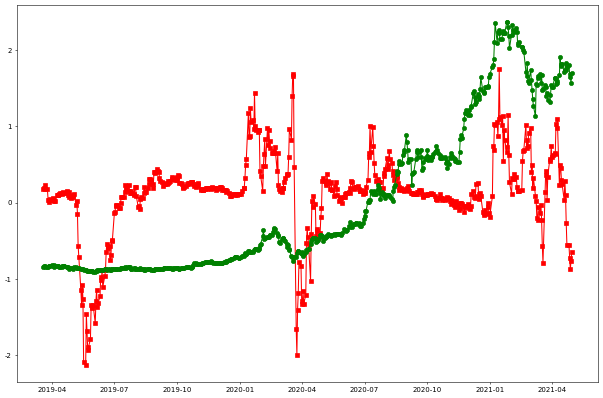

SVR 得分:-0.04160822638259698


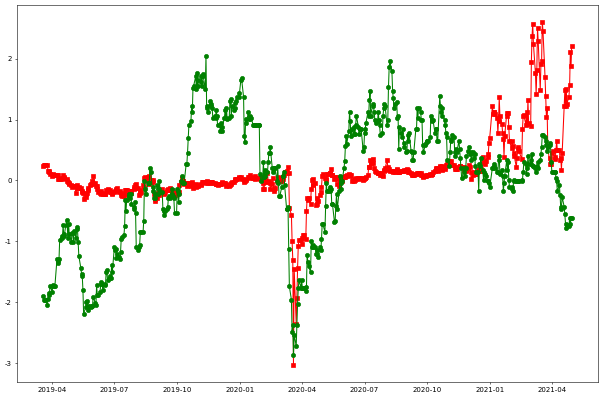

SVR 得分:-0.0012734304134982555


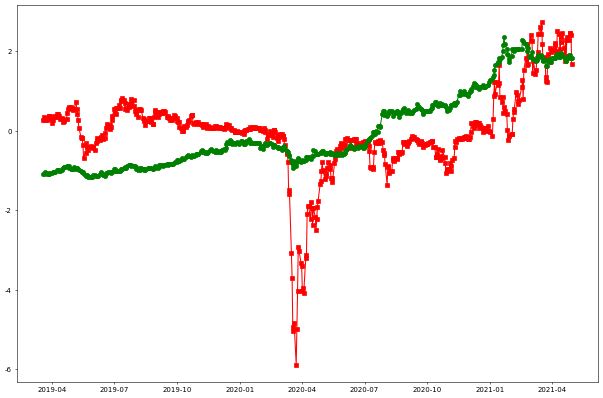

SVR 得分:-0.2646915505979872


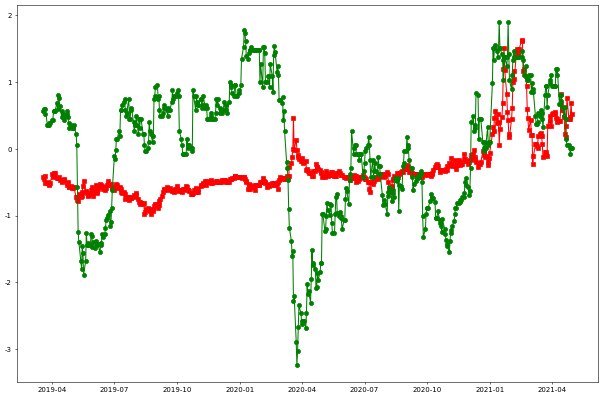

SVR 得分:-0.09748715942910957


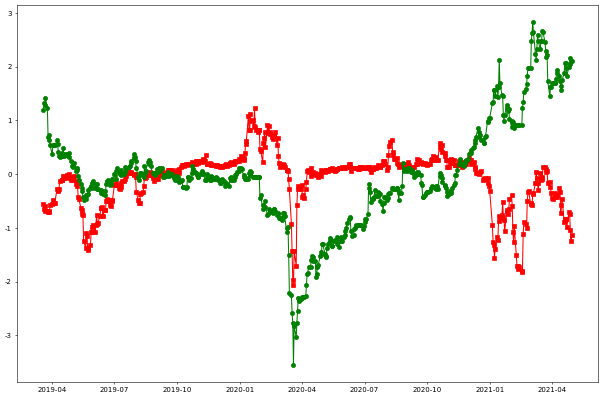

SVR 得分:-0.5202965084489355


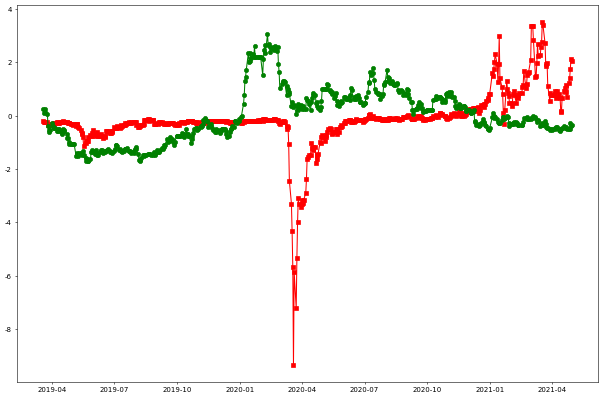

SVR 得分:-1.322516254308388


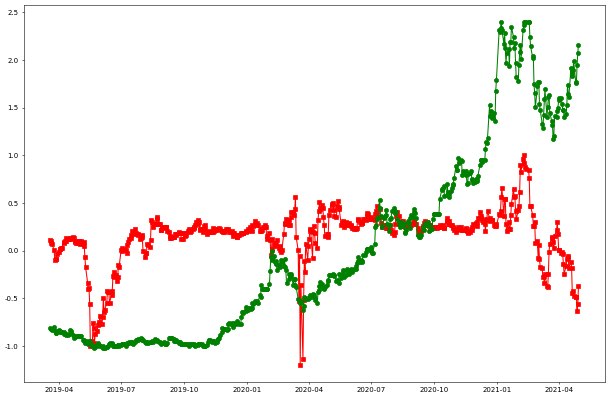

SVR 得分:0.04866321228020176


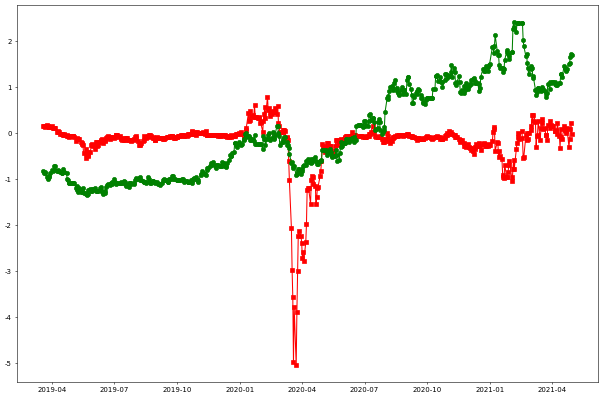

SVR 得分:-0.288428247121999


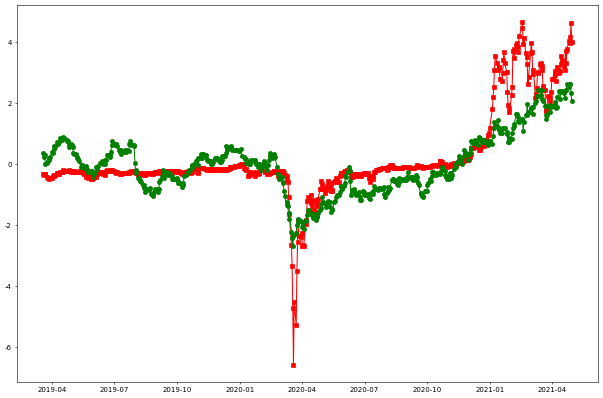

SVR 得分:0.33005512448437824


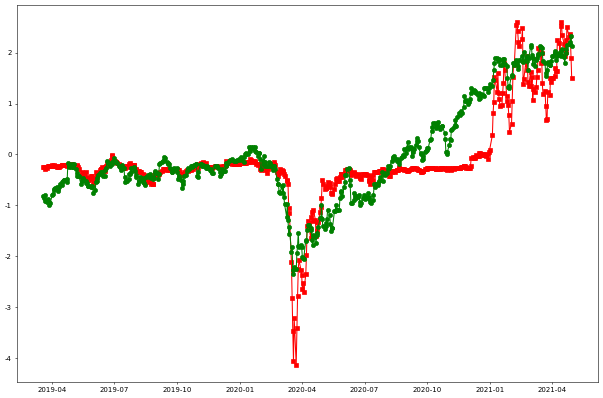

SVR 得分:0.7464558188064326


,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,315.183845,119.579041,396.960096,98.589088,44.775502,33.247172,181.087566,38.249186,14.666846,90.707842
1,318.488633,119.783741,408.966718,98.206917,44.415977,33.096739,178.088567,38.351985,14.621740,90.536103
2,315.254968,119.827994,399.979625,98.672469,44.634919,33.183803,180.469885,38.071592,14.717529,90.782318
3,331.053392,119.802487,405.351584,97.449183,44.316104,32.949077,177.225271,38.254802,14.671483,90.136583
4,318.215011,119.637679,397.790898,97.498998,44.330835,32.951637,170.533014,38.559979,14.343741,90.410288
...,...,...,...,...,...,...,...,...,...,...
546,126.868946,137.378942,659.292178,108.467276,44.247367,44.400376,121.431027,33.205427,33.963485,137.912421
547,82.195510,140.485464,683.340831,108.779622,44.109966,45.778024,121.130048,35.196012,33.591184,138.973595
548,44.349825,149.001123,682.111827,108.440850,43.004385,48.592841,106.543224,37.490303,34.494248,138.176854
549,72.860623,145.248403,675.895249,111.170148,42.240151,51.473499,113.320690,39.073006,36.448976,130.032806


In [ ]:
length= 200 #訓練期
rdf= pd.DataFrame() #用于保存所有股票的预测价格

for i in range(data.shape[1]):
  col= data.columns[i]

  x=data.loc[:,data.columns!=col]  #LOOP
  y=data.loc[:,col]   #LOOP
  

  x_train= x[:length]
  x_test= x[length:]

  y_train= y[:length]
  y_test= y[length:]

  x_train_scale= StandardScaler()
  #x_train= np.array(x_train).reshape(-1,1)
  x_train1= x_train_scale.fit_transform(x_train)

  x_test_scale= StandardScaler()
  #x_test= np.array(x_test).reshape(-1,1)
  x_test1= x_test_scale.fit_transform(x_test)

  y_train_scale= StandardScaler()
  y_train= np.array(y_train).reshape(-1,1)
  y_train1= y_train_scale.fit_transform(y_train)
  y_train1=y_train1.ravel()

  y_test_scale= StandardScaler()
  y_test= np.array(y_test).reshape(-1,1)
  y_test1= y_test_scale.fit_transform(y_test)
  y_test1=y_test1.ravel()

  #x_train
  #x_test

  date_test= date[length:]

  model= SVR(kernel='poly', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)
  model.fit(x_train1, y_train1)
  y_pred= model.predict(x_test1)
  name='SVR'
  plt.figure(figsize=(15,10),dpi=50,linewidth = 2)
  plt.plot(date_test,y_pred,'s-',color = 'r', label="forecast")
  plt.plot(date_test,y_test1,'o-',color = 'g', label="reality")
  plt.show()
  ypred_original=y_test_scale.inverse_transform(y_pred)
  score=model.score(x_test1,y_test1)
  print(name +' 得分:'+str(score))
  Y_test_predict_price= pd.DataFrame(ypred_original)
  result= Y_test_predict_price
  #print(Y_test_predict_price)
  rdf= pd.concat([rdf, result], axis=1, ignore_index=True)

rdf.columns= data.columns
rdf_svr= rdf
rdf_svr

In [ ]:
import os
import time
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/SVR預測結果')
print(os.getcwd() )#获取当前工作路径
timenow= time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 
type(timenow) #str

outstr= 'result'+ timenow + '.csv'
rdf_svr.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下

outstr

/content/gdrive/MyDrive/Colab Notebooks/SVR預測結果


'result2021-05-15 03:55:46.csv'

In [10]:
length= 200
rdf= pd.DataFrame() #用于保存所有股票的预测价格

for i in range(data.shape[1]):
  col= data.columns[i]

  x=data.loc[:,data.columns!=col]  #LOOP
  y=data.loc[:,col]   #LOOP
  

  x_train= x[:length]
  x_test= x[length:]

  y_train= y[:length]
  y_test= y[length:]

  x_train_scale= StandardScaler()
  #x_train= np.array(x_train).reshape(-1,1)
  x_train1= x_train_scale.fit_transform(x_train)

  x_test_scale= StandardScaler()
  #x_test= np.array(x_test).reshape(-1,1)
  x_test1= x_test_scale.fit_transform(x_test)

  y_train_scale= StandardScaler()
  y_train= np.array(y_train).reshape(-1,1)
  y_train1= y_train_scale.fit_transform(y_train)
  y_train1=y_train1.ravel()

  y_test_scale= StandardScaler()
  y_test= np.array(y_test).reshape(-1,1)
  y_test1= y_test_scale.fit_transform(y_test)
  y_test1=y_test1.ravel()

  #x_train
  #x_test

  date_test= date[length:]

  model= DecisionTreeRegressor( max_depth=10, max_features=None, max_leaf_nodes=None,
                               min_samples_leaf=10, min_samples_split=20, 
                               min_weight_fraction_leaf=0.0, presort=False, 
                               random_state=8, splitter='best')
  model.fit(x_train1, y_train1)
  y_pred= model.predict(x_test1)
  name='DecisionTreeRegressor'
  #plt.figure(figsize=(15,10),dpi=50,linewidth = 2)
  #plt.plot(date_test,pre,'s-',color = 'r', label="forecast")
  #plt.plot(date_test,y_test1,'o-',color = 'g', label="reality")
  #plt.show()
  ypred_original=y_test_scale.inverse_transform(y_pred)
  score=model.score(x_test1,y_test1)
  print(name +' 得分:'+str(score))
  #pd.DataFrame(ypred_original)

  Y_test_predict_price= pd.DataFrame(ypred_original)
  result= Y_test_predict_price
  rdf= pd.concat([rdf, result], axis=1, ignore_index=True)

rdf.columns= data.columns
rdf_dtr= rdf

DecisionTreeRegressor 得分:-1.351877856865932
DecisionTreeRegressor 得分:-0.8146877652012745
DecisionTreeRegressor 得分:-0.7540213140846836
DecisionTreeRegressor 得分:-0.7380626971466122
DecisionTreeRegressor 得分:-0.16990944735930058
DecisionTreeRegressor 得分:-0.5510295538549632
DecisionTreeRegressor 得分:-1.8163436741287318
DecisionTreeRegressor 得分:0.5541368126908508
DecisionTreeRegressor 得分:0.3694116209750483
DecisionTreeRegressor 得分:0.5660930521981314


In [11]:
import os
import time
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DTR預測結果')
print(os.getcwd() )#获取当前工作路径
timenow= time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 
type(timenow) #str

outstr= 'result'+ timenow + '.csv'
rdf_dtr.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下

outstr

/content/gdrive/MyDrive/Colab Notebooks/DTR預測結果


'result2021-05-15 05:38:26.csv'

In [ ]:
length= 200
rdf= pd.DataFrame() #用于保存所有股票的预测价格

for i in range(data.shape[1]):
  col= data.columns[i]

  x=data.loc[:,data.columns!=col]  #LOOP
  y=data.loc[:,col]   #LOOP
  

  x_train= x[:length]
  x_test= x[length:]

  y_train= y[:length]
  y_test= y[length:]

  x_train_scale= StandardScaler()
  #x_train= np.array(x_train).reshape(-1,1)
  x_train1= x_train_scale.fit_transform(x_train)

  x_test_scale= StandardScaler()
  #x_test= np.array(x_test).reshape(-1,1)
  x_test1= x_test_scale.fit_transform(x_test)

  y_train_scale= StandardScaler()
  y_train= np.array(y_train).reshape(-1,1)
  y_train1= y_train_scale.fit_transform(y_train)
  y_train1=y_train1.ravel()

  y_test_scale= StandardScaler()
  y_test= np.array(y_test).reshape(-1,1)
  y_test1= y_test_scale.fit_transform(y_test)
  y_test1=y_test1.ravel()

  #x_train
  #x_test

  date_test= date[length:]

  model= RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_leaf=1, bootstrap=True,
                        min_weight_fraction_leaf=0.01, max_features='auto',max_leaf_nodes=None, oob_score=False, n_jobs=1,
                        random_state=15, verbose=0, warm_start=False)
  model.fit(x_train1, y_train1)
  y_pred= model.predict(x_test1)
  name='RandomForestRegressor'
  ypred_original=y_test_scale.inverse_transform(y_pred)
  score=model.score(x_test1,y_test1)
  print(name +' 得分:'+str(score))
  #pd.DataFrame(ypred_original)

  Y_test_predict_price= pd.DataFrame(ypred_original)
  result= Y_test_predict_price
  rdf= pd.concat([rdf, result], axis=1, ignore_index=True)

rdf.columns= data.columns
rdf_rfr= rdf


RandomForestRegressor 得分:-0.33242827144432163
RandomForestRegressor 得分:-0.7757766518797975
RandomForestRegressor 得分:-0.4359827780757086
RandomForestRegressor 得分:-0.37638201934456883
RandomForestRegressor 得分:-0.26044681880784193
RandomForestRegressor 得分:-0.19205721318427083
RandomForestRegressor 得分:-1.0563464416068098
RandomForestRegressor 得分:0.7066303057436976
RandomForestRegressor 得分:0.46104530792458587
RandomForestRegressor 得分:0.4785231788196516
